<a href="https://colab.research.google.com/github/nawidadkhah/Graph_Simulation/blob/main/Graph_Q7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import gmean
from scipy.special import gamma
from networkx.algorithms import isomorphism

In [3]:
def find_girth(G):
  # Find all cycles in the graph
  cycles = nx.cycle_basis(G)

  # Find the minimum length of the cycles
  girth = min([len(cycle) for cycle in cycles])
  return girth

In [7]:
def node_generator(p1, p2, d1, d2, n1):
    label1 = 0
    label2 = n1
    s = d1 * n1
    for i in range(s):
      if i % d1 == 0:
        label1 += 1
      p1[i] = label1

      if i % d2 == 0:
        label2 += 1
      p2[i] = label2
    return p1, p2


In [9]:
def build_graph(final, p1, p2, size):
  for i in range(size):
    rand_index = np.random.choice(len(p1))
    random_node1 = p1[rand_index]
    p1 = np.delete(p1, rand_index)

    rand_index = np.random.choice(len(p2))
    random_node2 = p2[rand_index]

    # check if edge already exist
    tuple_to_check = (random_node1, random_node2)
    lst = [tuple(x) for x in final]
    max_iteration = len(p2)
    while tuple_to_check in lst and max_iteration >= 0:
        rand_index = np.random.choice(len(p2))
        random_node2 = p2[rand_index]
        tuple_to_check = (random_node1, random_node2)
        max_iteration -= 1

    if max_iteration < 0:
      return None, None, None

    p2 = np.delete(p2, rand_index)

    final[i] = (random_node1, random_node2)
  return final, p1, p2

In [5]:
def RSRBG(d1, d2, n):
  n1 = (n * d2) // (d1 + d2)
  n2 = (n * d1) // (d1 + d2)

  if n1 + n2 != n:
    return None

  partition1 = np.zeros(d1 * n1)
  partition2 = np.zeros(d2 * n2)

  dtype = [('node1', int), ('node2', int)]
  final_graph = np.zeros(d2 * n2, dtype=dtype)

  # initialize two np arrays
  partition1, partition2 = node_generator(partition1, partition2, d1, d2, n1)

  # choose random edges
  final_graph, partition1, partition2 = build_graph(final_graph, partition1,
                                                    partition2, d1 * n1)
  if final_graph is None:
    return None

  # Create an empty undirected graph
  G = nx.Graph()

  # Add edges to the graph from the list of tuples
  for edge in final_graph:
      G.add_edge(*edge)

  return G

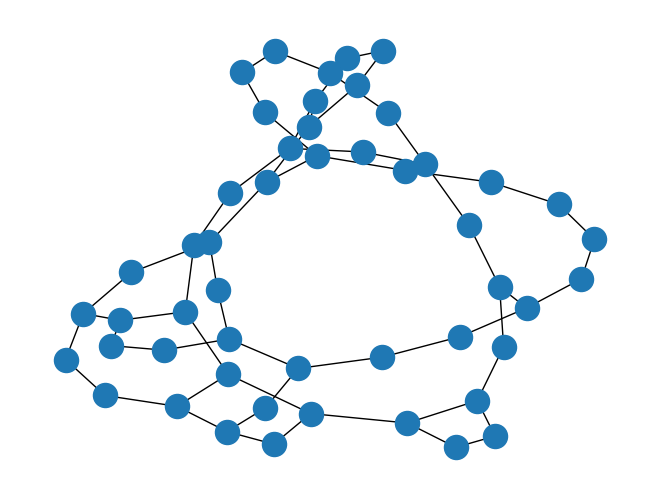

In [11]:
def RSRG(p, d1, d2, n):
  n1 = math.floor(n * (1-p))
  n2 = n - n1

  partition = np.zeros(d1 * n1 + d2 * n2)
  dtype = [('node1', int), ('node2', int)]
  final_graph = np.zeros((d1 * n1 + d2 * n2) // 2, dtype=dtype)

  label1 = 0
  label2 = n1
  size = d1 * n1
  for i in range(size):
    if i % d1 == 0:
      label1 += 1
    partition[i] = label1

  for i in range(size, d2 * n2 + size):
    if i % d2 == 0:
      label2 += 1
    partition[i] = label2

  i = 0
  while len(partition) > 1:

    rand_index = np.random.choice(len(partition))
    random_node1 = partition[rand_index]
    partition = np.delete(partition, rand_index)

    rand_index2 = np.random.choice(len(partition))
    random_node2 = partition[rand_index2]

    while rand_index2 == random_node1:
      rand_index2 = np.random.choice(len(partition))
      random_node2 = partition[rand_index2]

    partition = np.delete(partition, rand_index2)

    final_graph[i] = (random_node1, random_node2)
    i += 1

  # # Create an empty undirected graph
  G = nx.Graph()

  # Add edges to the graph from the list of tuples
  for edge in final_graph:
      G.add_edge(*edge)

  return G

graph = RSRG(0.4, 2, 3, 50)
nx.draw(graph)

In [ ]:
# Generating different graphs with same size to test girth
n = 20
d1 = 3
d2 = 2
p = 0.2
ER_p = 0.5
SF_m = 3
small_world_p = 0.3
small_world_nn = 4

ws_graph = nx.watts_strogatz_graph(n, small_world_nn, small_world_p)
er_graph = nx.erdos_renyi_graph(n, ER_p)
sf_graph = nx.barabasi_albert_graph(n, SF_m)
rsrb_graph = RSRBG(d1, d2, n)
rsr_graph = RSRG(p, d1, d2, n)

fig, ((ax1, ax2), (ax3, ax4), (ax5, _)) = plt.subplots(3, 2, figsize=(10, 15))

# Draw the first graph in the first subplot
nx.draw(ws_graph, ax=ax1, with_labels=True, node_color=['#E92DC3'], edge_color=['grey'])
ax1.set_title('WS Graph')

# Draw the second graph in the second subplot
nx.draw(er_graph, ax=ax2, with_labels=True, node_color=['#07BEB8'], edge_color=['grey'])
ax2.set_title('ER Graph')

# Draw the third graph in the third subplot
nx.draw(sf_graph, ax=ax3, with_labels=True, node_color=['#8F3985'], edge_color=['grey'])
ax3.set_title('SF Graph')

# Draw the fourth graph in the fourth subplot
nx.draw(rsrb_graph, ax=ax4, with_labels=True,  node_color=['#008B8B'], edge_color=['grey'])
ax4.set_title('RSRB Graph')

# Draw the fifth graph in the fifth subplot
nx.draw(rsr_graph, ax=ax5, with_labels=True, node_color=['#7B68EE'], edge_color=['grey'])
ax5.set_title('RSR Graph')

# Remove the last empty subplot
fig.delaxes(_)

# Adjust the layout of the subplots
fig.tight_layout()